In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [2]:
df = pd.read_csv("3cities_r2.csv")
print("✅ Dataset Loaded Successfully!")
df.head()

✅ Dataset Loaded Successfully!


,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [3]:
df = df.fillna(df.mean(numeric_only=True))
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])


In [4]:
le = LabelEncoder()
for col in ['name_of_city', 'state_name', 'location']:
    df[col] = le.fit_transform(df[col])

print("\n✅ Label Encoding Done!")


✅ Label Encoding Done!


In [5]:
X = df[['effective_literacy_rate_total']]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("\n✅ Data Scaled Successfully!")


✅ Data Scaled Successfully!


In [7]:
Z = linkage(X_scaled, method='ward')  # Ward minimizes variance between clusters

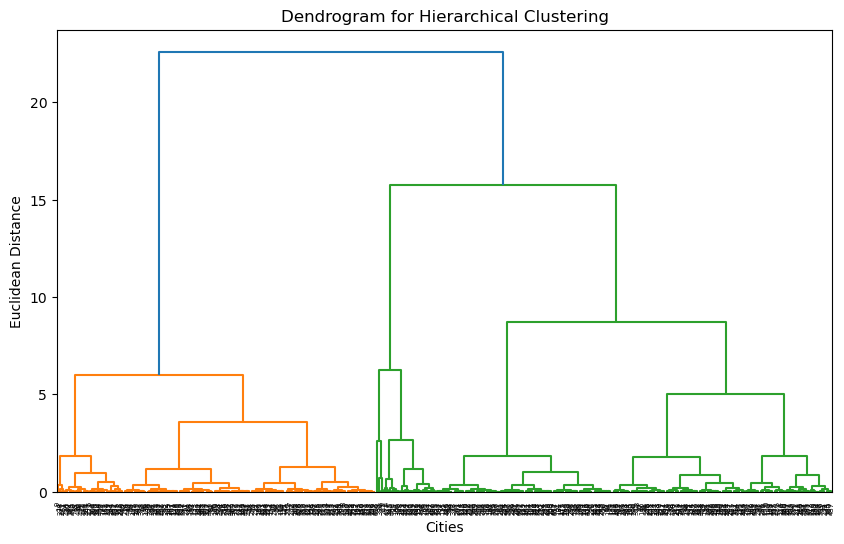

In [8]:
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Dendrogram for Hierarchical Clustering')
plt.xlabel('Cities')
plt.ylabel('Euclidean Distance')
plt.show()

In [9]:
clusters = fcluster(Z, t=3, criterion='maxclust')
df['Cluster'] = clusters

print("\n✅ Hierarchical Clustering Applied Successfully!")
print(df[['name_of_city', 'effective_literacy_rate_total', 'Cluster']].head())


✅ Hierarchical Clustering Applied Successfully!
   name_of_city  effective_literacy_rate_total  Cluster
0             0                          79.86        3
1             1                          91.99        1
2             2                          80.51        3
3             3                          83.46        3
4             4                          68.38        2


In [10]:
print("\nAverage Literacy Rate per Cluster:")
print(df.groupby('Cluster')['effective_literacy_rate_total'].mean())



Average Literacy Rate per Cluster:
Cluster
1    90.447291
2    71.010526
3    82.978611
Name: effective_literacy_rate_total, dtype: float64


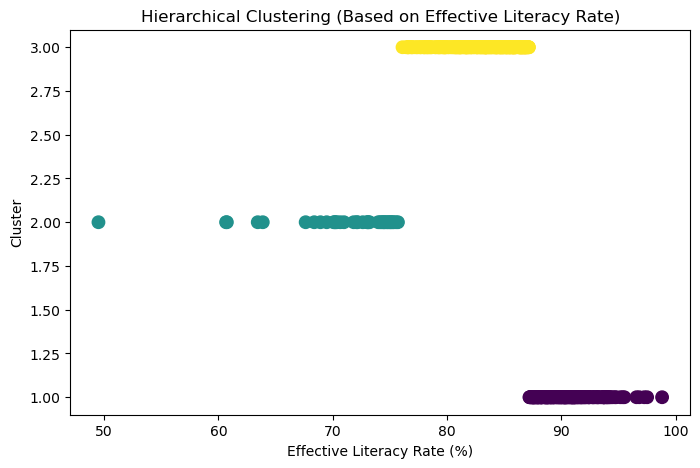

In [11]:
plt.figure(figsize=(8,5))
plt.scatter(df['effective_literacy_rate_total'], df['Cluster'], c=df['Cluster'], cmap='viridis', s=80)
plt.xlabel('Effective Literacy Rate (%)')
plt.ylabel('Cluster')
plt.title('Hierarchical Clustering (Based on Effective Literacy Rate)')
plt.show()